In [1]:
# Uncomment model you want to use and
# comment the one you don't want to use

# model using resnet pretrained model
# from resnet_model import *
# model home made and home trained
from from_scratch_model import *
from utils import *

In [2]:
# generating train and test (more like validation) datasets
# with given train proportion [0, 0.999] into flowers_data directory
# generate_data(0.7)

In [3]:
train_loader, test_loader = construct_loaders(batch_size=16)

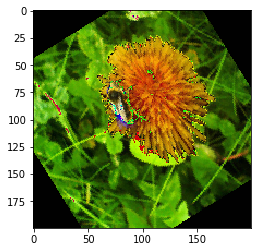

dandelion


tensor(0.9843)

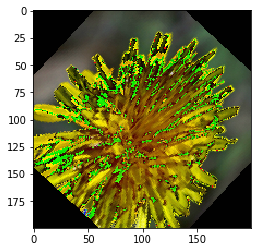

dandelion


tensor(0.9922)

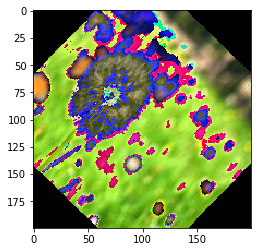

dandelion


tensor(1.)

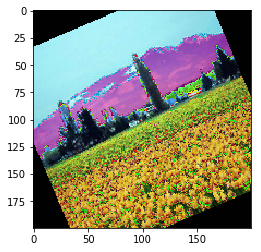

tulip


tensor(1.)

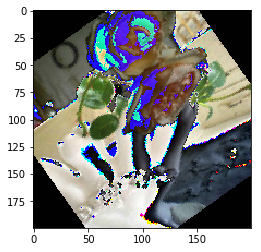

rose


tensor(0.9059)

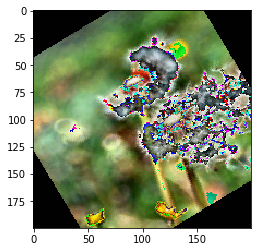

dandelion


tensor(1.)

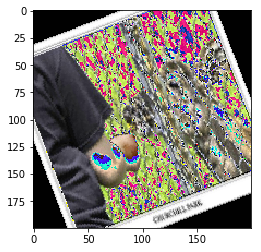

daisy


tensor(1.)

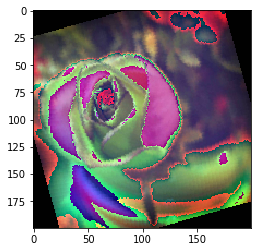

rose


tensor(0.8510)

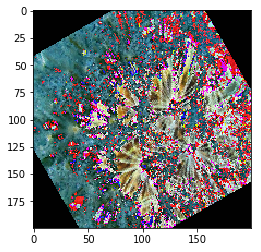

dandelion


tensor(0.9059)

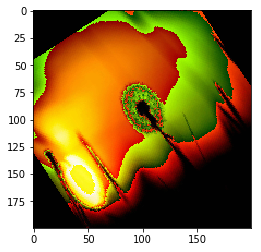

dandelion


tensor(1.)

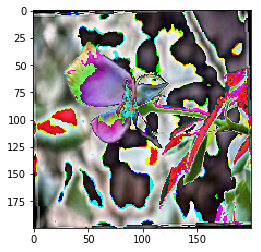

rose


tensor(1.)

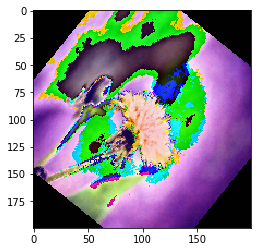

dandelion


tensor(1.)

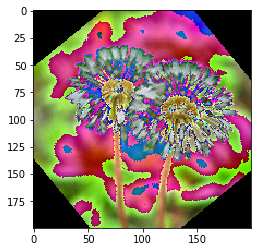

dandelion


tensor(0.9765)

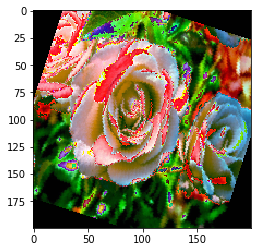

rose


tensor(1.)

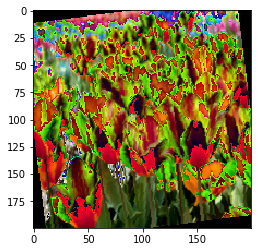

tulip


tensor(1.)

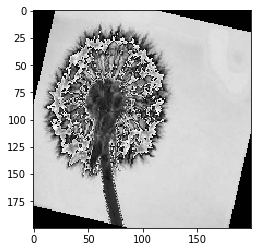

dandelion


tensor(0.9294)

In [4]:
# show some elements of train dataset
max_i = 15
for i, (data, target) in enumerate(train_loader):
    trans_to_pil = transforms.ToPILImage()
    plt.imshow(trans_to_pil(data[1,:]))
    plt.show()
    print(get_category_list()[target[1]])
    if i >= max_i:
        break

In [5]:
# init imported model 
model = FlowerNet()
# uncomment if you want to train model
"""
# model parameters (nb_epochs, learning_rate, momentum, device) are imported from the model python file
train_accuracies, test_accuracies = train_model(model, train_loader, test_loader, nb_epochs, learning_rate, momentum, device)
# plot accuracies of train and test through epochs 
plt.plot(test_accuracies, label="test")
plt.plot(train_accuracies, label="train")
plt.legend()
plt.show()
"""
# load model from saved checkpoint 
load_model(model, "model_checkpoints/from_scratch.checkp", device)

FlowerNet(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (lin3): Linear(in_features=64, out_features=5, bias=True)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [6]:
# building the confusion matrix
nb_classes = len(get_category_list())
confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(test_loader):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
            confusion_matrix[t.long(), p.long()] += 1


In [7]:
# printing the confusion matrix
print(get_category_list())
print("Abscisse : real label")
print("Ordinate : prediction")
print(confusion_matrix)
print(confusion_matrix.diag()/confusion_matrix.sum(1))

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
Abscisse : real label
Ordinate : prediction
tensor([[142.,  64.,  13.,   8.,   4.],
        [ 17., 269.,   4.,  24.,   2.],
        [ 32.,  27., 121.,   6.,  50.],
        [  9.,  44.,   4., 158.,   6.],
        [ 12.,  27.,  77.,  13., 167.]])
tensor([0.6147, 0.8513, 0.5127, 0.7149, 0.5642])


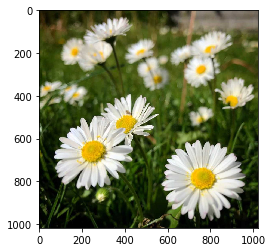

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
Catgory found : daisy
Output : tensor([[ 3.0014, -1.1019, -0.7117, -1.0435, -0.4812]], device='cuda:0',
       grad_fn=<AddmmBackward>)



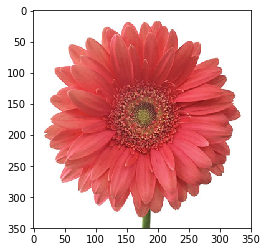

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
Catgory found : rose
Output : tensor([[-0.9080, -2.1553,  2.7543, -1.8649,  2.1414]], device='cuda:0',
       grad_fn=<AddmmBackward>)



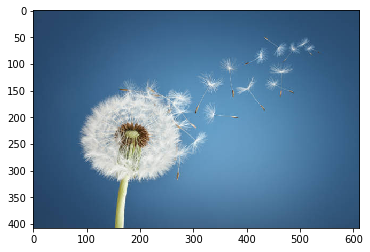

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
Catgory found : dandelion
Output : tensor([[-0.1831,  3.2616, -0.7062, -1.2778, -0.6286]], device='cuda:0',
       grad_fn=<AddmmBackward>)



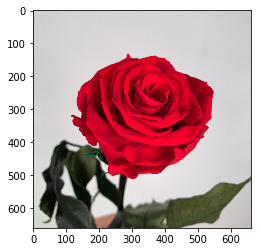

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
Catgory found : rose
Output : tensor([[-0.1446, -2.0054,  2.0982, -1.5564,  1.4218]], device='cuda:0',
       grad_fn=<AddmmBackward>)



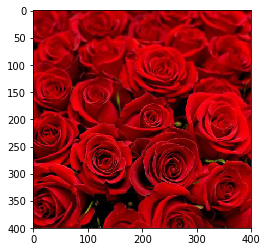

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
Catgory found : rose
Output : tensor([[-2.0415, -1.8826,  4.2698, -2.5154,  1.9009]], device='cuda:0',
       grad_fn=<AddmmBackward>)



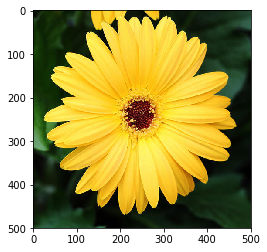

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
Catgory found : tulip
Output : tensor([[-0.8633,  0.5239, -0.8854,  0.7612,  0.7971]], device='cuda:0',
       grad_fn=<AddmmBackward>)



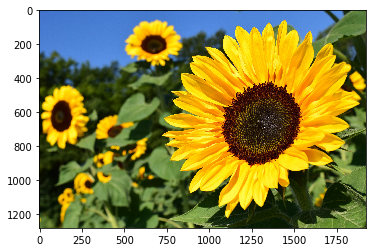

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
Catgory found : sunflower
Output : tensor([[-1.3322,  0.7130, -2.4322,  3.8277, -0.4839]], device='cuda:0',
       grad_fn=<AddmmBackward>)



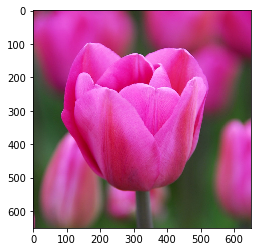

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
Catgory found : rose
Output : tensor([[-1.6769, -3.6255,  4.7431, -3.0264,  3.4910]], device='cuda:0',
       grad_fn=<AddmmBackward>)



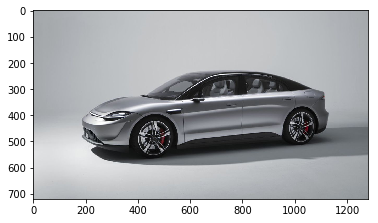

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
Catgory found : daisy
Output : tensor([[ 0.6322,  0.4243,  0.0567, -0.8681, -0.3482]], device='cuda:0',
       grad_fn=<AddmmBackward>)



In [8]:
# predict type of the flowers of real-test images
for subdir, dirs, files in os.walk("real_test/"):
    for file in files:
        predict_image("real_test/" + file, model)

In [9]:
# uncomment if you want to save model
# save_model(model, "model_checkpoints/from_scratch.checkp")